# Project 3

In [5]:
import nltk
!pip install py-readability-metrics
from readability import Readability
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


In [6]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H101.txt', encoding="utf8") as h:
    H101Raw = h.read()

In [7]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H113.txt', encoding="utf8") as h:
    H113Raw = h.read()

In [8]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H201.txt', encoding="utf8") as h:
    H201Raw = h.read()

In [9]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H213.txt', encoding="utf8") as h:
    H213Raw = h.read()

In [10]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H301.txt', encoding="utf8") as h:
    H301Raw = h.read()

In [11]:
with open(r'C:\Users\elian\Downloads\hannibal_scripts\H313.txt', encoding="utf8") as h:
    H313Raw = h.read()

In [12]:
def getClean(rawScript,start):
        rawScript = rawScript.lower()
        #tokenizedScript = nltk.word_tokenize(rawScript)
        startIndex = rawScript.index(start)
        cleanScript = rawScript[startIndex:]
        return cleanScript

In [13]:
H101Clean = getClean(H101Raw,'teaser')
H113Clean = getClean(H113Raw,'teaser')
H201Clean = getClean(H201Raw,'teaser')
H213Clean = getClean(H213Raw,'teaser')
H301Clean = getClean(H301Raw,'teaser')
H313Clean = getClean(H313Raw,'teaser')

In [14]:
hannibal = {"season-1": 
            {"101": H101Clean, "113": H113Clean},
            "season-2": 
            {"201": H201Clean, "213": H213Clean },
            "season-3":
            {"301": H301Clean, "313":H313Clean}}


# 2. Sanity Check

In [15]:
hannibal["season-1"]["101"][100:110]

'hes across'

In [16]:
hannibal["season-1"]["113"][100:110]

' the woods'

In [17]:
hannibal["season-2"]["201"][100:110]

'iniature o'

In [18]:
hannibal["season-2"]["213"][100:110]

'as he star'

In [19]:
hannibal["season-3"]["301"][100:110]

'reedom. ou'

In [20]:
hannibal["season-3"]["313"][100:110]

'atching th'

# 3. Write a paragraph or two about your corpus. Why did you choose it? How did you organize it? What genres does it belong to? What, if anything, is distinctive about its language? And what do you expect to find in your computational analysis?

I chose this text because Hannibal is one of my favorite shows; I selected both the first and last episode of every season so I could analyze the differences between each season and how the respective episodes demonstrate the plot development. I organized the text in dictionaries based on season, and the genre of this corpus is a TV Show, specifically, a show crime/thriller TV show. While watching the show, I often find myself confused at what the character Hannibal Lecter is saying because the style of the script is very "romantic" in a sense, since there are always a lot of flowery adjectives and unnecessary metaphors. Also while watching the show, I find myself thinking "there's no way people talk like this in real life" which is true, because rarely will people speak in extended metaphors. That is one of the reasons why I chose to analyze this TV Show in particular because its unique dialogue style really contributes to the atmosphere of the show and I would like to compare it how people talk regularly. I think that the style of Hannibal is really distinct, so using functions like "generate" and finding POS patterns will probably produce a result that is unique to the style of Hannibal.

# 4-5 Show some basic text statistics about each text in your corpus.  
## d) Ratio of male pronouns to female pronouns

In [21]:
def find_pronouns():
    male_pronouns =  ["he", "him", "his"]
    female_pronouns = ["she", "her", "hers"]
    male_count = 0 
    female_count = 0
    pronouns = {}
    for season in hannibal.values():
        for name, episode in season.items():
            episode = episode.split()
            for words in episode:
                if words in male_pronouns:
                    male_count+=1
                if words in female_pronouns:
                    female_count+= 1 
            pronouns[name] = (female_count, male_count)
            print(name,"Male Pronouns: ", male_count, "Female Pronouns: ", female_count, "Ratio of Male to Female Pronouns: ", male_count/female_count)       

In [22]:
find_pronouns()

101 Male Pronouns:  265 Female Pronouns:  123 Ratio of Male to Female Pronouns:  2.154471544715447
113 Male Pronouns:  484 Female Pronouns:  202 Ratio of Male to Female Pronouns:  2.396039603960396
201 Male Pronouns:  674 Female Pronouns:  246 Ratio of Male to Female Pronouns:  2.7398373983739837
213 Male Pronouns:  826 Female Pronouns:  335 Ratio of Male to Female Pronouns:  2.4656716417910447
301 Male Pronouns:  989 Female Pronouns:  449 Ratio of Male to Female Pronouns:  2.202672605790646
313 Male Pronouns:  1160 Female Pronouns:  520 Ratio of Male to Female Pronouns:  2.230769230769231


## a) Length of each text, in number of words, number of sentences, and number of paragraphs or stanzas, if applicable.

In [23]:
#length of the texts in number of words
for season in hannibal.values():
    for name,episode in season.items():
        episode = nltk.word_tokenize(episode)
        print(name, ":", len(episode))

101 : 12420
113 : 11774
201 : 10107
213 : 8973
301 : 9898
313 : 9106


In [24]:
#lenght of texts in number of sentences
for season in hannibal.values():
    for name, episode in season.items():
        episode = nltk.sent_tokenize(episode)
        print(name, ":", len(episode))

101 : 1072
113 : 1086
201 : 898
213 : 815
301 : 768
313 : 751


In [25]:
#length of texts in number of paragraphs
for season in hannibal.values():
    for name, episode in season.items():
        episode = episode.split('\n\n')
        print(name, ":", len(episode))

101 : 730
113 : 697
201 : 644
213 : 538
301 : 624
313 : 552


## e. Readability score for each (any of the common readability formulas (Links to an external site.) will do). If the NLTK Text.readability() doesn’t work, you may use an external Python library for calculating readability, or just implement your own.

In [26]:
for season in hannibal.values():
    for name, episode in season.items():
        episode = nltk.word_tokenize(episode)
        episodeText = str(episode)
        r = Readability(episodeText)
        r.gunning_fog()
        gf = r.gunning_fog()
        print("The readibility score for episode", name, "is", gf.score, "and the readability grade level is", gf.grade_level)

The readibility score for episode 101 is 8.00089207328343 and the readability grade level is 8
The readibility score for episode 113 is 8.368476847684768 and the readability grade level is 8
The readibility score for episode 201 is 8.465471445642606 and the readability grade level is 8
The readibility score for episode 213 is 8.190437249381574 and the readability grade level is 8
The readibility score for episode 301 is 10.00806981654614 and the readability grade level is 10
The readibility score for episode 313 is 8.03454979326865 and the readability grade level is 8


## c. Part-of-speech distribution for each section

In [27]:
def pos_distribution():
    pos_dist = {}
    for season in hannibal.values():
        for name, episode in season.items():
            episode = nltk.word_tokenize(episode)
            tagPairs = nltk.pos_tag(episode) # returns a list of tuples (word, POS tag)
            onlyTags = [pair[1] for pair in tagPairs]
            pos_dist[name] = nltk.FreqDist(onlyTags)
    return pos_dist

In [28]:
posStats = pos_distribution()

<AxesSubplot:title={'center':'POS Distribution'}, xlabel='Parts of Speech Tags', ylabel='frequency'>

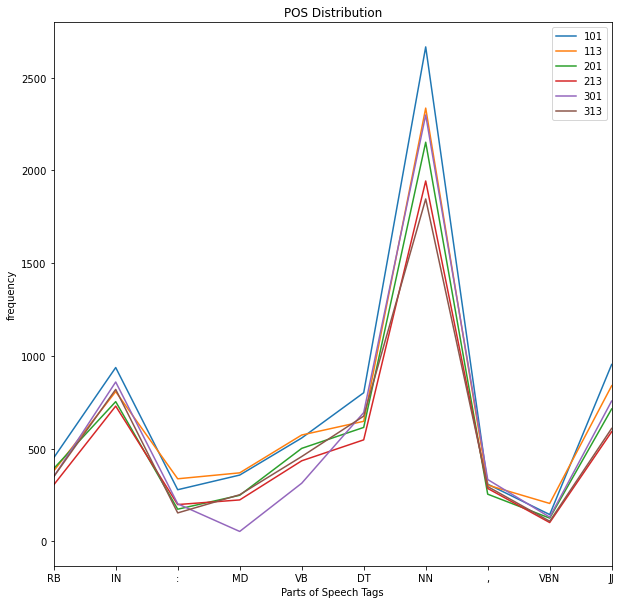

In [29]:
df = pd.DataFrame(posStats.values(), index = posStats.keys())
df  = df.T
df.plot(figsize = (10, 10), title = 'POS Distribution',xlim= (0, 9), xlabel = 'Parts of Speech Tags', ylabel = "frequency")

# 6.Write a paragraph or two about what you notice happening in your results, and what that might tell you about your corpus.

Overall, in conducting this analysis, my predictions matched the generated outcomes, although, for the readability scores I expected the script to be at a higher literacy level. For the majority of the episodes I selected, the gunnning fog readability metric determined that the scripts were at an eighth grade reading level. While watching the show, the dialogue sometimes get hard to understand because some of the characters seem to speak in riddles; however, the 8th grade reading level may be due to the fact that the entirety of the script includes stage directions and such, which are usually quite easy to comprehend. Something that was interesting as well was the length of the episodes; whether it was analyzing the word, sentence, or paragraph length, there is a steady downward trend. I believe this may be because, as the show became more established, less introductory details and dialogue were required for the plot of the show.

Throughout the episodes I analyzed, there was always at least double the amount of male pronouns compared to the amount of female pronouns. This is logical, as the show's two main characters are male and there is a lack of female characters to begin with (I think there's about 4 or 5 throughout the entirety of the show). I think the ratio of male-to-female pronouns somewhat accurately represents the  plot of the show, since in season 3 there is an increase in female pronouns, which coincides with one of the main female characters enters a lesbian relationship which is somewhat central to the plot. Additionally, the POS distribution graph shows that there is a constant majority of nouns within the episodes, which, again is logical, considering the fact that a script might have to describe the relationship between characters and their environment moreso than a novel.